In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import zipfile
import os

# Define the paths
zip_file_path = '/content/drive/My Drive/archive (1).zip'  # Adjust the path accordingly
destination_folder = '/content/bear_dataset'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Extracted files to: {destination_folder}")


Extracted files to: /content/bear_dataset


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_dir='/content/bear_dataset/PandasBears/Train'
test_dir='/content/bear_dataset/PandasBears/Test'

In [6]:
train_transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

])
test_transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [7]:
train_dataset=datasets.ImageFolder(train_dir,transform=train_transform)
test_dataset=datasets.ImageFolder(test_dir,transform=test_transform)

In [8]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=True)

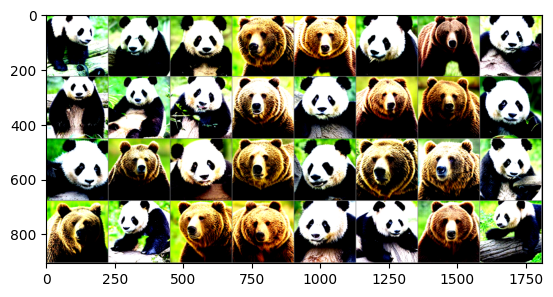

Pandas Pandas Pandas Bears Bears Pandas Bears Pandas Pandas Pandas Pandas Bears Pandas Bears Bears Pandas Pandas Bears Pandas Bears Pandas Bears Bears Pandas Bears Pandas Bears Bears Pandas Pandas Bears Pandas


In [10]:
def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

dataiter=iter(train_loader)
images,labels=next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{train_dataset.classes[labels[j]]:5}' for j in range(32)))


In [17]:
class CustomCNN(nn.Module):
  def __init__(self):
    super(CustomCNN,self).__init__()
    self.conv1=nn.Conv2d(3,32,kernel_size=3,padding=1)
    self.conv2=nn.Conv2d(32,64,kernel_size=3,padding=1)
    self.conv3=nn.Conv2d(64,128,kernel_size=3,padding=1)
    self.pool=nn.MaxPool2d(2,2)
    self.fc1=nn.Linear(128*28*28,512)
    self.fc2=nn.Linear(512,256)
    self.fc3=nn.Linear(256,2)

  def forward(self,x):
    x=self.pool(torch.relu(self.conv1(x)))
    x=self.pool(torch.relu(self.conv2(x)))
    x=self.pool(torch.relu(self.conv3(x)))
    x=x.view(-1,128*28*28)
    x=torch.relu(self.fc1(x))
    x=torch.relu(self.fc2(x))
    x=self.fc3(x)
    return x

device=torch.device('cuda' if torch.cuda.is_available() else ' cpu')
model=CustomCNN().to(device)

In [18]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [20]:
num_epochs=10
for epoch in range(num_epochs):
  model.train()
  total=0
  correct=0
  running_loss=0.0
  for images,labels in train_loader:
    images=images.to(device)
    labels=labels.to(device)
    optimizer.zero_grad()
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
    _,predicted=torch.max(outputs,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()
  train_loss=running_loss/len(train_loader)
  train_accuracy=100*correct/total
  print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%')


Epoch [1/10], Loss: 0.6132, Accuracy: 84.60%
Epoch [2/10], Loss: 0.0318, Accuracy: 99.00%
Epoch [3/10], Loss: 0.0060, Accuracy: 99.60%
Epoch [4/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [5/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [6/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [7/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [8/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [9/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [10/10], Loss: 0.0000, Accuracy: 100.00%


In [22]:
model.eval()
test_total=0
test_correct=0
for images,labels in test_loader:
  images=images.to(device)
  labels=labels.to(device)
  outputs=model(images)
  _,predicted=torch.max(outputs,1)
  test_total+=labels.size(0)
  test_correct+=(predicted==labels).sum().item()
test_accuracy=100*test_correct/test_total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 100.00%
